# Analyzing global internet patterns

## 📖 Background
In this competition, you'll be exploring a dataset that highlights internet usage for different countries from 2000 to 2023. Your goal is import, clean, analyze and visualize the data in your preferred tool.

The end goal will be a clean, self explanatory, and interactive visualization. By conducting a thorough analysis, you'll dive deeper into how internet usage has changed over time and the countries still widely impacted by lack of internet availability. 


## 💾 Data

#### You have access to the following file, but you can supplement your data with other sources to enrich your analysis. 

### Interet Usage (`internet_usage.csv`)
|   Column name  |   Description | 
|---------------|-----------|
| Country Name | Name of the country |
| Country Code | Countries 3 character country code|
| 2000 | Contains the % of population of individuals using the internet in 2000  |
| 2001 | Contains the % of population of individuals using the internet in 2001  |
| 2002 | Contains the % of population of individuals using the internet in 2002  |
| 2003 | Contains the % of population of individuals using the internet in 2003  |
| .... | ...  |
| 2023 | Contains the % of population of individuals using the internet in 2023  |

**The data can be downloaded from the _Files_ section (_File_ > _Show workbook files_).**

## 💪 Challenge
Use a tool of your choice to create an interesting visual or dashboard that summarizes your analysis! 

Things to consider:
1. Use this Workspace to prepare your data (optional).
2. Stuck on where to start, here's some ideas to get you started: 
    - Visualize interner usage over time, by country 
    - How has internet usage changed over time, are there any patterns emerging? 
    - Consider bringing in other data to supplement your analysis 
3. Create a screenshot of your main dashboard / visuals, and paste in the designated field. 
4. Summarize your findings in an executive summary.

### 1. Preparing internet access data


In [2]:
import pandas as pd
import numpy as np
import requests
import missingno as msno
from Zoho.ZohoAnalyticsPythonClient.AnalyticsClient import AnalyticsClient, response_obj, ServerError, ParseError


internet_usage = pd.read_csv("data/downloads/internet_usage.csv") 
internet_usage.head(10)

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..
5,Angola,AGO,0.105046,0.136014,0.270377,0.370682,0.464815,1.14337,1.5,1.7,...,21.3623,22,23.2,26,29,32.1294,36.6347,37.8067,39.2935,..
6,Antigua and Barbuda,ATG,6.48223,8.89929,12.5,17.2286,24.2665,27,30,34,...,67.78,70,73,76.2,79.6,83.2,86.8837,87.074,91.4123,..
7,Argentina,ARG,7.03868,9.78081,10.8821,11.9137,16.0367,17.7206,20.9272,25.9466,...,64.7,68.0431,70.969,74.2949,77.7,79.947,85.5144,87.1507,88.3754,89.229
8,Armenia,ARM,1.30047,1.63109,1.96041,4.57522,4.89901,5.25298,5.63179,6.02125,...,54.6228,59.1008,64.346,64.7449,68.2451,66.5439,76.5077,78.6123,77.0277,..
9,Aruba,ABW,15.4428,17.1,18.8,20.8,23,25.4,28,30.9,...,83.78,88.6612,93.5425,97.17,..,..,..,..,..,..


In [3]:
# check for missing values
internet_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  217 non-null    object
 1   Country Code  217 non-null    object
 2   2000          217 non-null    object
 3   2001          217 non-null    object
 4   2002          217 non-null    object
 5   2003          217 non-null    object
 6   2004          217 non-null    object
 7   2005          217 non-null    object
 8   2006          217 non-null    object
 9   2007          217 non-null    object
 10  2008          217 non-null    object
 11  2009          217 non-null    object
 12  2010          217 non-null    object
 13  2011          217 non-null    object
 14  2012          217 non-null    object
 15  2013          217 non-null    object
 16  2014          217 non-null    object
 17  2015          217 non-null    object
 18  2016          217 non-null    object
 19  2017    

In [4]:
# there are no 'null values', so replace the '..' with NaN
internet_usage.replace('..', np.nan, inplace=True)

internet_usage.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,NaN,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,7,8.26,11,13.5,16.8,17.6,18.4,NaN,NaN,NaN
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,NaN
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,10.5388,NaN,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,86.1,87.9,89.7,91.5675,NaN,90.7187,93.2056,93.8975,94.4855,NaN


<Axes: >

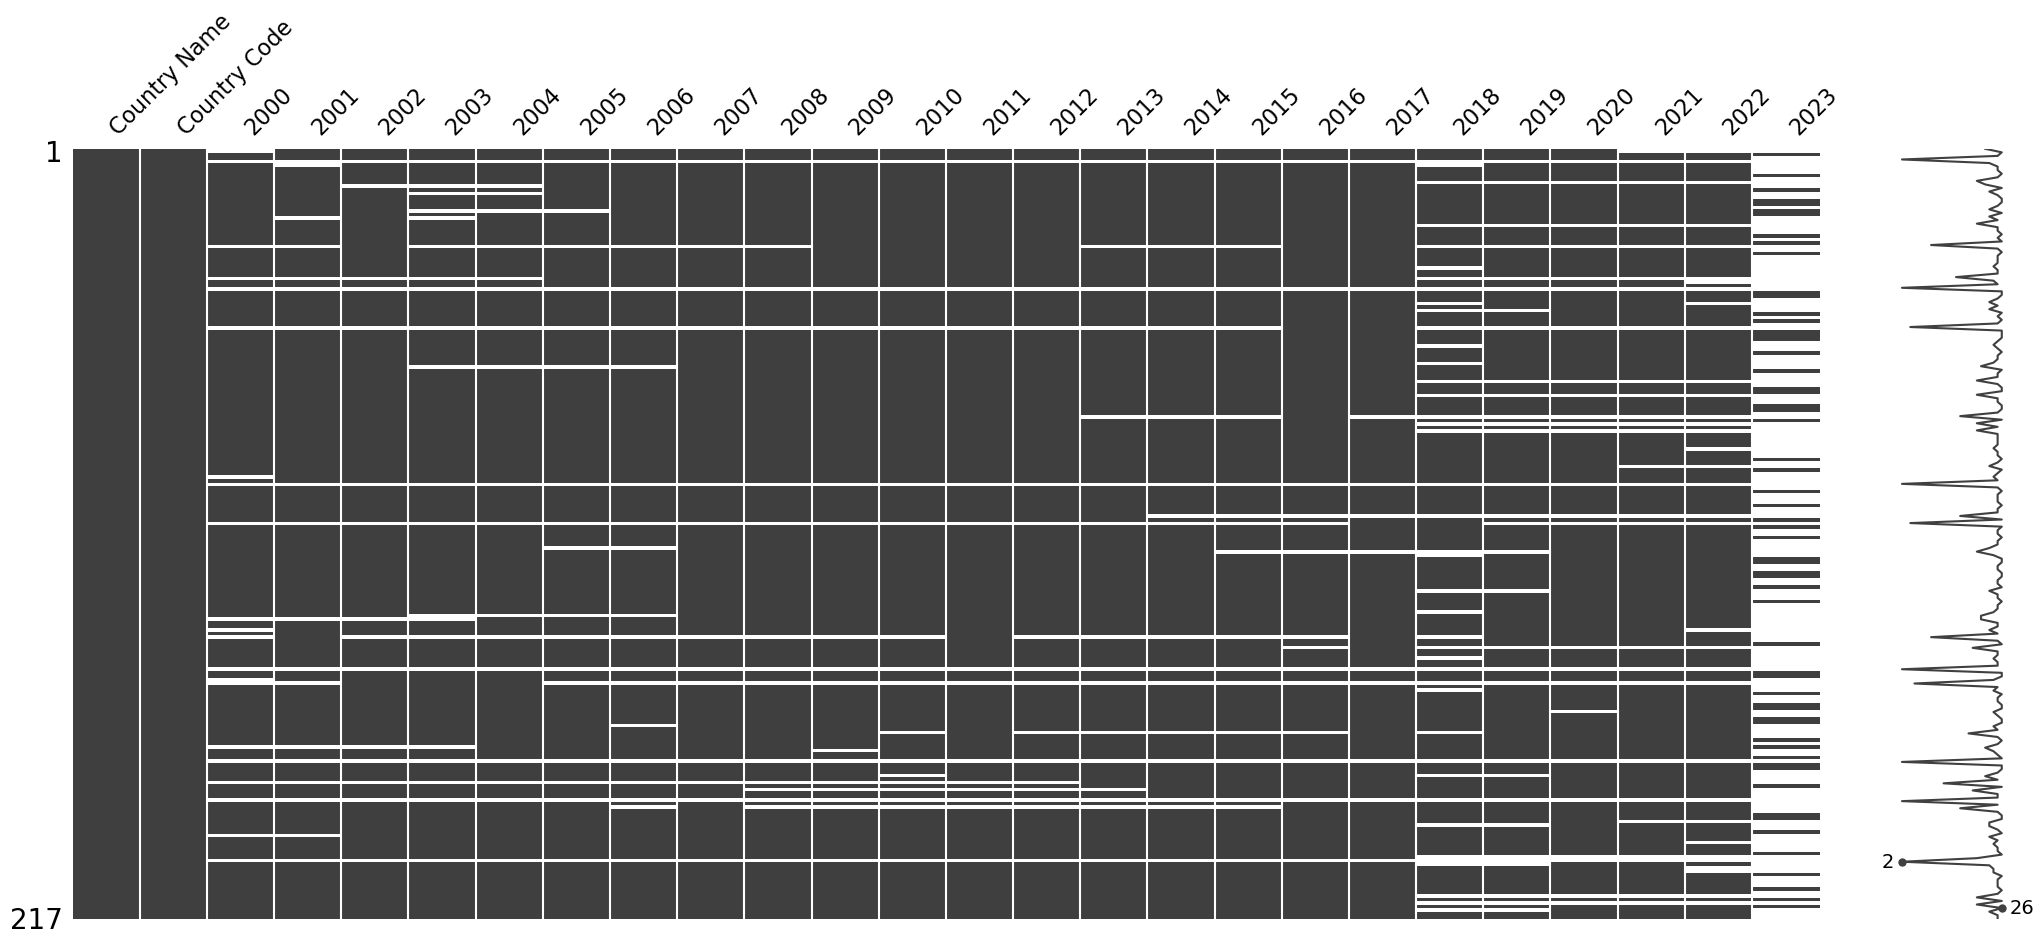

In [5]:
msno.matrix(internet_usage)

<Axes: >

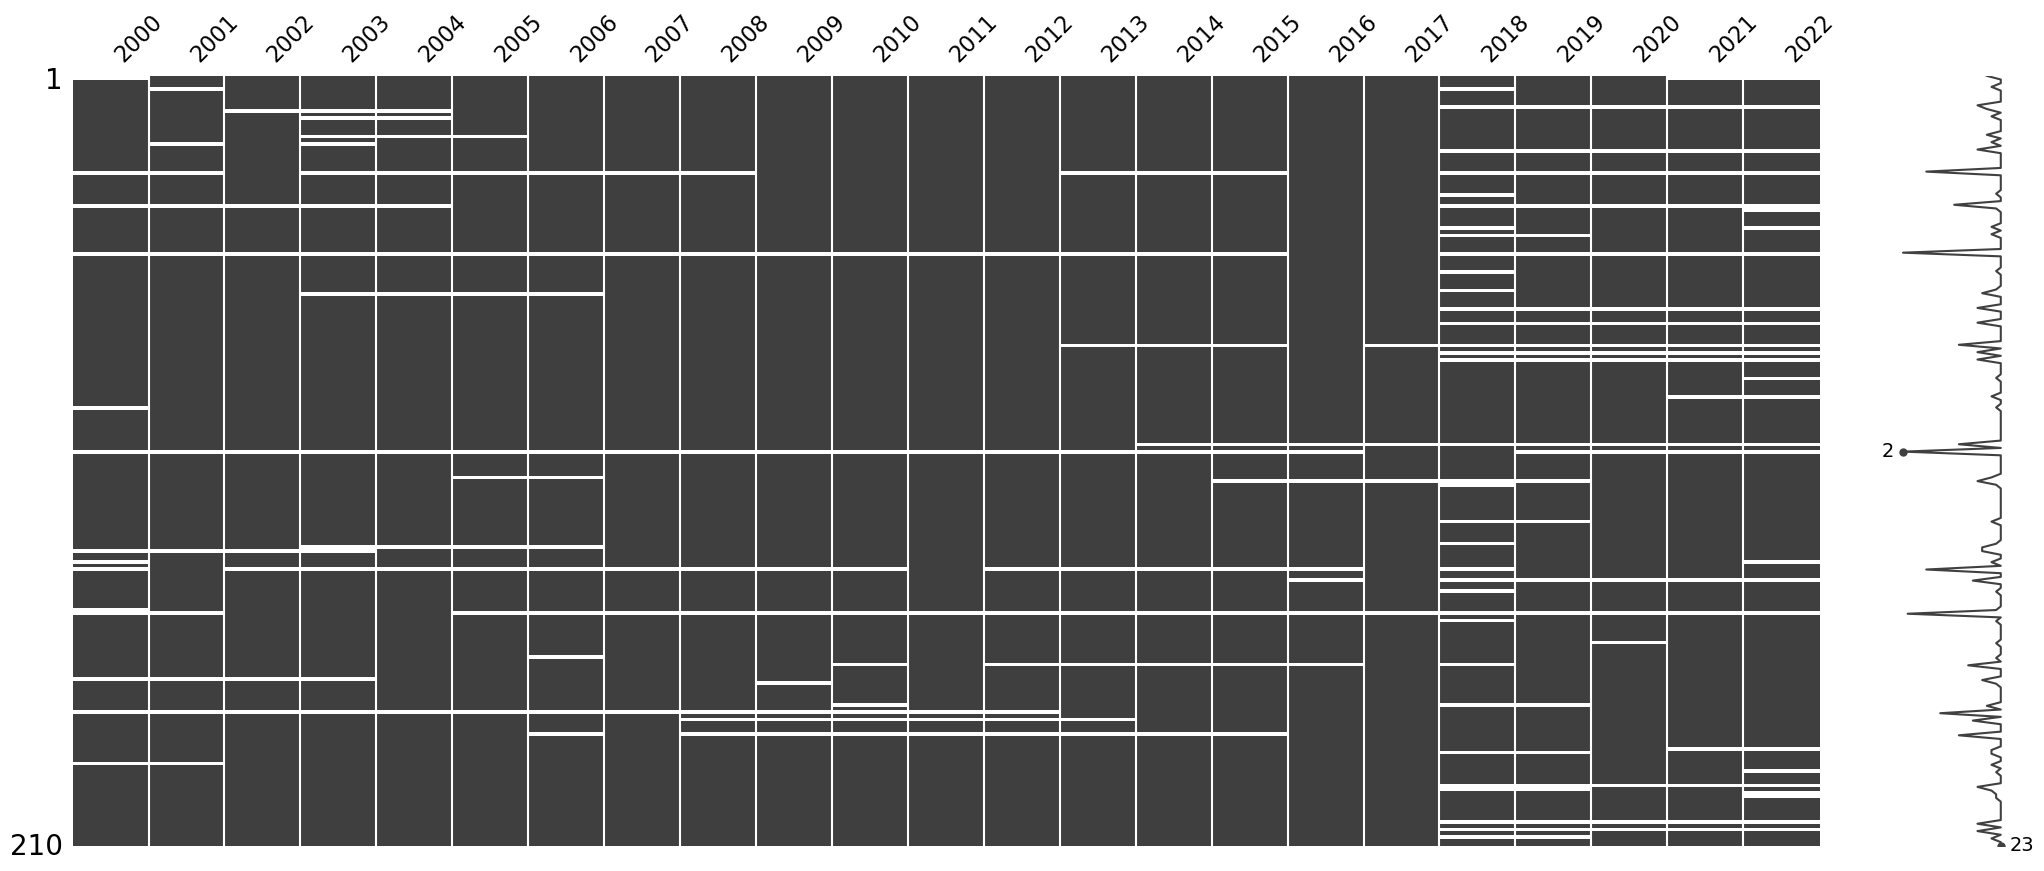

In [6]:
internet_usage.set_index(['Country Name', 'Country Code'], inplace=True)

# 2023 is missing a lot of data, so drop this column
internet_usage.drop(columns='2023', inplace=True)

# drop rows missing data every year
all_years: list[str] = [str(year) for year in range(2000, 2023)]
internet_usage.dropna(axis=0, how='all', subset=all_years, inplace=True)

# visualise results
msno.matrix(internet_usage)

<Axes: >

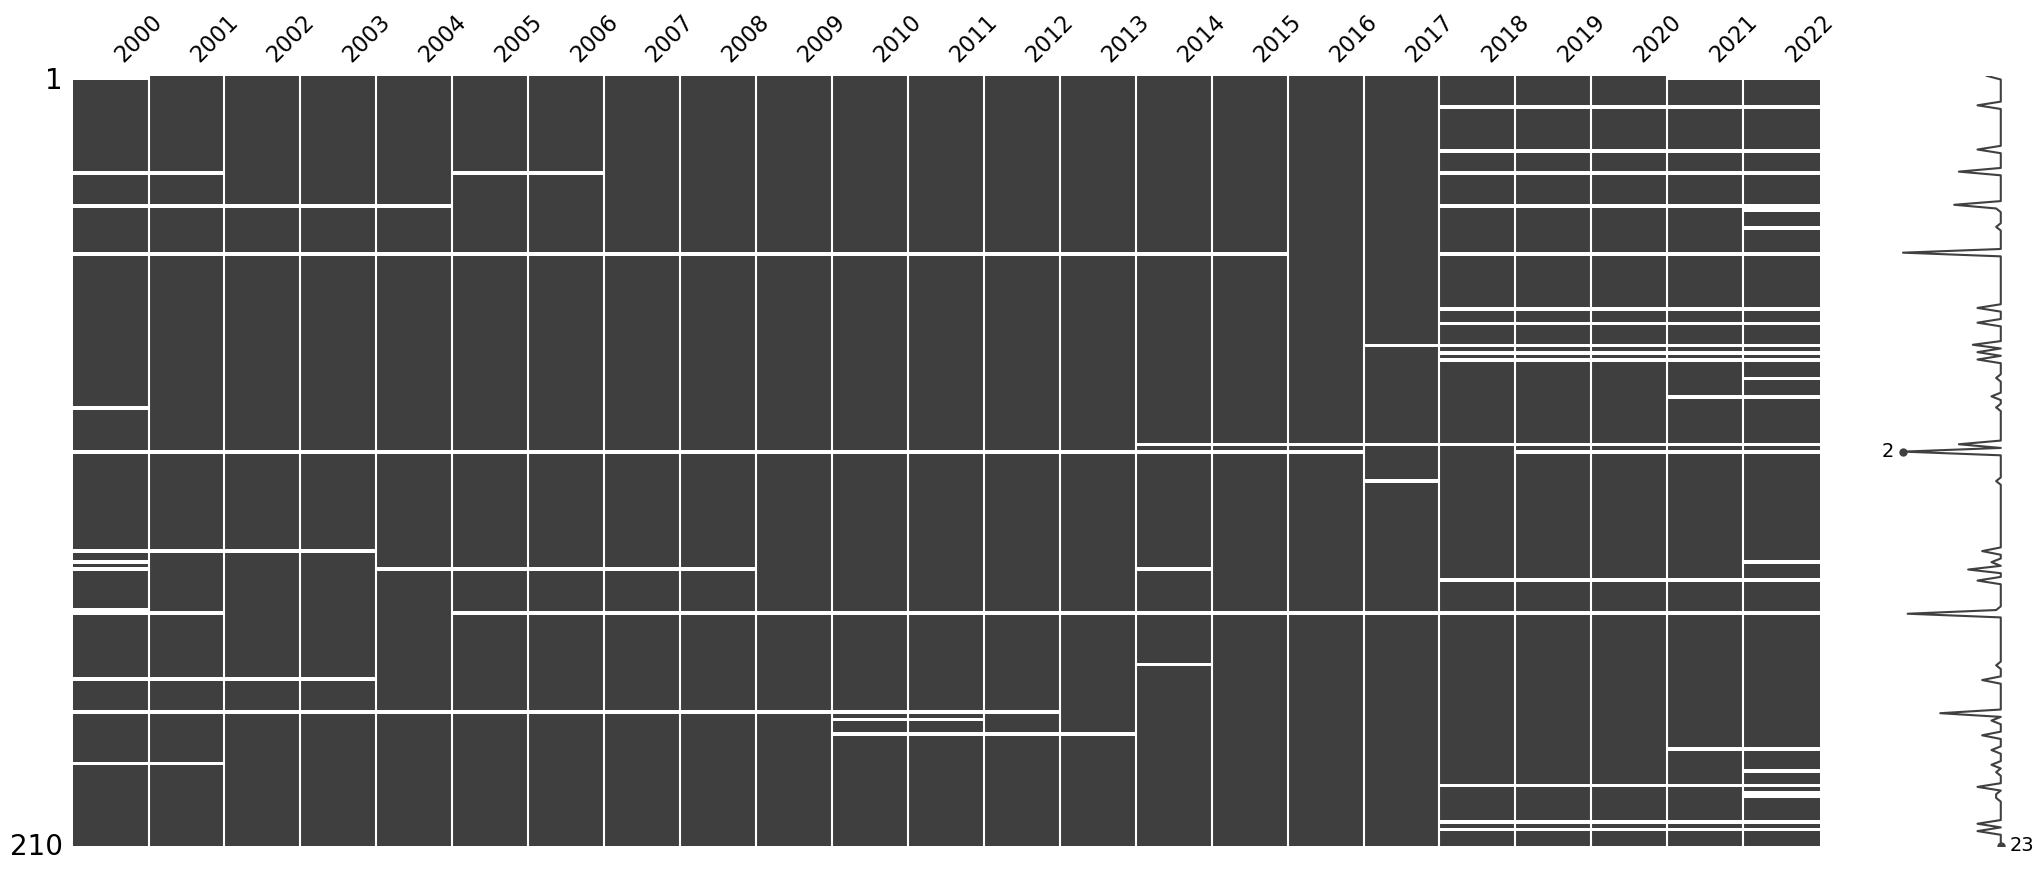

In [7]:
# still lots of missing data, so fill from the previous/lead year 
# a maximum of 2 times
# limit area inside to only fill NaNs if surrounded by valid values
internet_usage = internet_usage.T
internet_usage.ffill(limit=2, inplace=True, limit_area='inside')
internet_usage.bfill(limit=2, inplace=True, limit_area='inside')

# visualise results
msno.matrix(internet_usage.T)

In [8]:
# view data
internet_usage.head()

Country Name,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Viet Nam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
Country Code,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,ABW,AUS,...,URY,UZB,VUT,VEN,VNM,VIR,PSE,YEM,ZMB,ZWE
2000,NaN,0.114097,0.491706,10.5388,0.105046,6.48223,7.03868,1.30047,15.4428,46.7561,...,10.5391,0.484347,2.10834,3.3596,0.254248,13.8151,1.11131,0.0825004,0.191072,0.401434
2001,0.00472257,0.325798,0.646114,10.5388,0.136014,8.89929,9.78081,1.63109,17.1,52.6893,...,11.1214,0.597568,2.83057,4.636,1.26565,18.3758,1.83685,0.0908025,0.23313,0.799846
2002,0.0045614,0.390081,1.59164,11.2605,0.270377,12.5,10.8821,1.96041,18.8,52.6893,...,11.4195,1.08194,3.51004,4.91045,1.855,27.4944,3.10009,0.518796,0.477751,1.1
2003,0.0878913,0.9719,2.19536,13.5464,0.370682,17.2286,11.9137,4.57522,20.8,52.6893,...,15.9371,1.9126,3.9033,7.49996,3.78028,27.4291,4.13062,0.604734,0.980483,1.8
2004,0.105809,2.42039,4.63448,26.838,0.464815,24.2665,16.0367,4.89901,23,63,...,17.0631,2.59373,4.7466,8.40447,7.64241,27.377,4.4009,0.881223,1.1,2.1
2005,1.22415,6.04389,5.84394,37.6058,1.14337,27,17.7206,5.25298,25.4,63,...,20.0882,3.34351,5.08233,12.553,12.7399,27.3443,16.005,1.0486,1.3,2.4
2006,2.10712,9.60999,7.37598,48.9368,1.5,30,20.9272,5.63179,28,66,...,29.4,6.38832,5.85059,15.2247,17.2546,27.3326,18.41,1.24782,1.6,2.4
2007,1.9,15.0361,9.45119,70.87,1.7,34,25.9466,6.02125,30.9,69.45,...,34,7.4906,6.8,20.83,20.7554,27.3393,21.176,5.01,1.9,3
2008,1.84,23.86,10.18,70.04,1.9,38,28.1126,6.21,52,71.67,...,39.3,9.08011,7.26912,25.88,23.92,27.3618,24.358,6.89,2.2,3.5


In [9]:
# Reverse transposition
internet_usage = internet_usage.T

# Update data types
internet_usage = internet_usage.astype('float')
internet_usage.dtypes

2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
dtype: object

In [10]:
# Round floating point numbers to 2 d.p.
internet_usage = internet_usage.apply(round, args=([2]))

# Save to csv
internet_usage.to_csv('data/export/internet_usage.csv')

# view data
internet_usage.head()

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,Country Code,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,NaN,0.00,0.00,0.09,0.11,1.22,2.11,1.90,1.84,3.55,...,5.9,7.00,8.26,11.00,13.50,16.80,17.60,18.40,NaN,NaN
Albania,ALB,0.11,0.33,0.39,0.97,2.42,6.04,9.61,15.04,23.86,41.20,...,51.8,54.30,56.90,59.60,62.40,65.40,68.55,72.24,79.32,82.61
Algeria,DZA,0.49,0.65,1.59,2.20,4.63,5.84,7.38,9.45,10.18,11.23,...,22.5,29.50,38.20,42.95,47.69,49.04,58.98,60.65,66.24,71.24
Andorra,AND,10.54,10.54,11.26,13.55,26.84,37.61,48.94,70.87,70.04,78.53,...,84.4,86.10,87.90,89.70,91.57,91.57,90.72,93.21,93.90,94.49
Angola,AGO,0.11,0.14,0.27,0.37,0.46,1.14,1.50,1.70,1.90,2.30,...,13.0,21.36,22.00,23.20,26.00,29.00,32.13,36.63,37.81,39.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),VIR,13.82,18.38,27.49,27.43,27.38,27.34,27.33,27.34,27.36,27.40,...,45.3,50.07,54.84,59.61,64.38,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,PSE,1.11,1.84,3.10,4.13,4.40,16.00,18.41,21.18,24.36,32.23,...,46.6,53.67,56.70,59.90,63.30,64.40,70.62,76.01,81.83,88.65
"Yemen, Rep.",YEM,0.08,0.09,0.52,0.60,0.88,1.05,1.25,5.01,6.89,9.96,...,20.0,22.55,24.09,24.58,26.72,26.72,26.72,13.82,14.89,17.69


In [11]:
# reshape data in long format for racing chart
internet_usage_lf = internet_usage.reset_index().melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='access %')

# save to csv
internet_usage_lf.to_csv('data/export/iu_long_format.csv')

# view data
internet_usage_lf.head()

,Country Name,Country Code,Year,access %
0,Afghanistan,AFG,2000,NaN
1,Albania,ALB,2000,0.11
2,Algeria,DZA,2000,0.49
3,Andorra,AND,2000,10.54
4,Angola,AGO,2000,0.11
...,...,...,...,...
4825,Virgin Islands (U.S.),VIR,2022,NaN
4826,West Bank and Gaza,PSE,2022,88.65
4827,"Yemen, Rep.",YEM,2022,17.69
4828,Zambia,ZMB,2022,31.23


#### 1.1 Internet usage by gender

### 2. Subscription type

### 3. Internet servers

### 4. 4g Coverage

### 5. Other Economic Indicators

Now let's get some data from other sources
- Share of people in range of 4G network: Data sources: International Telecommunication Union – processed by Our World in Data

In [12]:
# Fetch the 4g data
4g_access = pd.read_csv("https://ourworldindata.org/grapher/share-with-4g-mobile-network-coverage.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the associated metadata
4g_metadata = requests.get("https://ourworldindata.org/grapher/share-with-4g-mobile-network-coverage.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

SyntaxError: invalid decimal literal (1366468718.py, line 2)

In [ ]:
# Import data to Zoho analytics
zoho_client = AnalyticsClient(client_id=, client_secret=, refresh_token=)

In [4]:
help(AnalyticsClient)

## ✍️ Judging criteria
| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Visualizations** | 50% | <ul><li>Appropriateness of visualizations used.</li><li>Clarity of insight from visualizations.</li></ul> |
| **Summary** | 35%       | <ul><li>Clarity of insights - how clear and well presented the findings are.</li>
| **Votes** | 15% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## 🧾 Executive summary
_In a couple of lines, write your main findings here._

## 📷 Visual/Dashboard screenshot
_Paste one screenshot of your visual/dashboard here._

## 🌐 Upload your dashboard (optional)
Ideally, paste your link to your online available dashboard here.

Otherwise, upload your dashboard file to the _Files_ section (_File_ > _Show workbook files_).